# üìä Pr√©diction du D√©lai de Paiement √† partir de FEC Fictifs

Projet fictif visant √† pr√©dire le **d√©lai de paiement des clients** √† partir de donn√©es comptables simul√©es, similaires √† des FEC (Fichiers d'√âcriture Comptable).

Ce notebook pr√©sente toutes les √©tapes : simulation des donn√©es, pr√©paration, mod√©lisation, √©valuation et visualisation.

## üîß 1. Simulation de donn√©es FEC fictives

In [3]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime

# Simulation de 1000 √©critures comptables
np.random.seed(42)
n = 1000
df = pd.DataFrame({
    'EcritureDate': pd.to_datetime('2022-01-01') + pd.to_timedelta(np.random.randint(0, 365, size=n), unit='d'),
    'Montant': np.random.uniform(100, 5000, size=n),
    'Debit': np.random.uniform(0, 2500, size=n),
    'Credit': np.random.uniform(0, 2500, size=n),
    'ClientID': np.random.randint(1000, 1050, size=n)
})

# G√©n√©rer une date de paiement post√©rieure √† la date d‚Äô√©criture
df['DatePaiementClient'] = df['EcritureDate'] + pd.to_timedelta(np.random.randint(5, 120, size=n), unit='d')
df['Delai'] = (df['DatePaiementClient'] - df['EcritureDate']).dt.days
df.head()

EcritureDate      Montant        Debit       Credit  ClientID  \
0   2022-04-13  2709.688220  2414.555403  1303.240119      1016   
1   2022-12-15   353.935330  1081.244696  2440.034558      1005   
2   2022-09-28  1749.360963   779.540333   313.875537      1018   
3   2022-04-17   758.631917  1265.354657    42.369162      1037   
4   2022-03-13   410.537355  1098.779222  1925.395529      1027   

  DatePaiementClient  Delai  
0         2022-07-08     86  
1         2023-02-25     72  
2         2023-01-23    117  
3         2022-07-28    102  
4         2022-06-18     97

## üßπ 2. Pr√©paration des donn√©es

In [25]:

X = df[['Montant', 'Debit', 'Credit']]
y = df['Delai']

## üìä 3. Exploration rapide

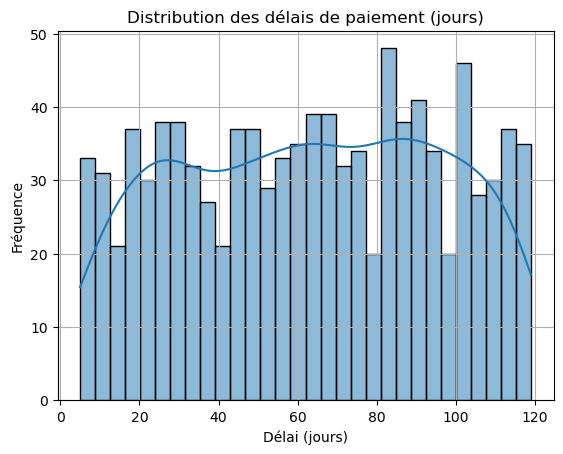

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Delai'], bins=30, kde=True)
plt.title('Distribution des d√©lais de paiement (jours)')
plt.xlabel('D√©lai (jours)')
plt.ylabel('Fr√©quence')
plt.grid(True)
plt.show()

## ü§ñ 4. Entra√Ænement du mod√®le

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

## üìà 5. √âvaluation du mod√®le

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f} jours")
print(f"RMSE : {rmse:.2f} jours")
print(f"R¬≤   : {r2:.4f}")

MAE : 31.37 jours
RMSE : 36.65 jours
R¬≤   : -0.1914


C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## üìâ 6. Visualisation des pr√©dictions vs r√©el

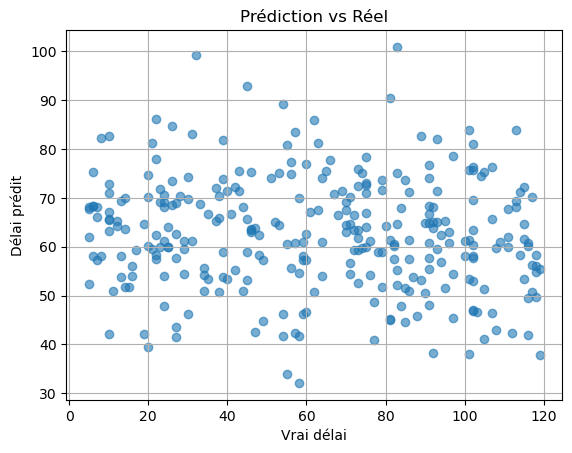

In [13]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Vrai d√©lai')
plt.ylabel('D√©lai pr√©dit')
plt.title('Pr√©diction vs R√©el')
plt.grid(True)
plt.show()

## üöÄ 7. Am√©liorations futures

- Ajouter des variables sur le profil client (anciennet√©, typologie, pays)
- Int√©grer la saisonnalit√© (mois, trimestre)
- Utiliser des techniques NLP sur les libell√©s
- Passer √† des mod√®les plus complexes : XGBoost, CatBoost, etc.

## ‚úÖ 8. Conclusion
Ce projet simule une approche simple de pr√©diction du d√©lai de paiement client √† partir de donn√©es FEC. Id√©al pour d√©montrer la capacit√© √† exploiter des donn√©es brutes comptables en vue d'une aide √† la d√©cision.